In [1]:
""" Way 1 """
import pandas as pd
data = [{'A': 7, 'B': 12, 'C':14, 'D': 19}, 
        {'A': 8, 'B': 17, 'C':18, 'D': 25},
        {'A': 15, 'B': 13, 'C':19, 'D': 22},
        {'A': 11, 'B': 18, 'C':17, 'D': 23},
        {'A': 9, 'B': 19, 'C':16, 'D': 18},
        {'A': 10, 'B': 15, 'C':18, 'D': 20}
        ] 
df_ = pd.DataFrame(data)
print('df_ =', df_)
print('\n')

df = pd.melt(df_.reset_index(),
            value_vars=['A', 'B', 'C', 'D'])
# replace column names
df.columns = ['Group', 'Value']
print('df =', df)

df_ =     A   B   C   D
0   7  12  14  19
1   8  17  18  25
2  15  13  19  22
3  11  18  17  23
4   9  19  16  18
5  10  15  18  20


df =    Group  Value
0      A      7
1      A      8
2      A     15
3      A     11
4      A      9
5      A     10
6      B     12
7      B     17
8      B     13
9      B     18
10     B     19
11     B     15
12     C     14
13     C     18
14     C     19
15     C     17
16     C     16
17     C     18
18     D     19
19     D     25
20     D     22
21     D     23
22     D     18
23     D     20


In [2]:
""" Way 2 """
import pandas as pd
data = [{'Group': 'A', 'Value': 7},
        {'Group': 'A', 'Value': 8},
        {'Group': 'A', 'Value': 15},
        {'Group': 'A', 'Value': 11},
        {'Group': 'A', 'Value': 9},
        {'Group': 'A', 'Value': 10},
        #
        {'Group': 'B', 'Value': 12},
        {'Group': 'B', 'Value': 17},
        {'Group': 'B', 'Value': 13},
        {'Group': 'B', 'Value': 18},
        {'Group': 'B', 'Value': 19},
        {'Group': 'B', 'Value': 15},
        #
        {'Group': 'C', 'Value': 14},
        {'Group': 'C', 'Value': 18},
        {'Group': 'C', 'Value': 18},
        {'Group': 'C', 'Value': 17},
        {'Group': 'C', 'Value': 16},
        {'Group': 'C', 'Value': 18},
        #
        {'Group': 'D', 'Value': 19},
        {'Group': 'D', 'Value': 25},
        {'Group': 'D', 'Value': 22},
        {'Group': 'D', 'Value': 23},
        {'Group': 'D', 'Value': 18},
        {'Group': 'D', 'Value': 20}]

df = pd.DataFrame(data)
df

,Group,Value
0,A,7
1,A,8
2,A,15
3,A,11
4,A,9
5,A,10
6,B,12
7,B,17
8,B,13
9,B,18


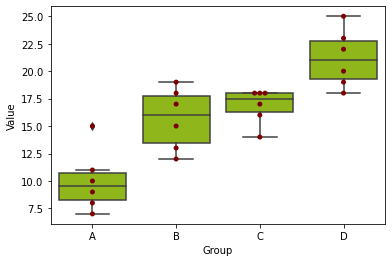

In [3]:
# Use boxplot to see the data distribution

import seaborn as sns
ax = sns.boxplot(x='Group', y='Value', data=df, color='#9cd000')
ax = sns.swarmplot(x="Group", y="Value", data=df, color='#7d0000')

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Value ~ Group', data=df).fit()
df_anova = sm.stats.anova_lm(model, typ=2)
df_anova

,sum_sq,df,F,PR(>F)
Group,380.833333,3.0,19.991251,0.000003
Residual,127.000000,20.0,NaN,NaN


In [5]:
import scipy.stats
M = 4
N = 6
scipy.stats.f.ppf(q=1-0.01, dfn=M-1, dfd=M*(N-1))

4.938193382310539